## Import Libraries

In [94]:
#libs for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Read DATA

In [5]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Make an EDA

In [6]:
# List all the columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Dropping the duplicates
df_train = df_train.drop_duplicates()

In [8]:
#Shape of the data that we are deaing with

print("Nbr of Rows : %s" % df_train.shape[0])
print("Nbr of Columns : %s" % df_train.shape[1])

Nbr of Rows : 891
Nbr of Columns : 12


In [9]:
#Using pandas options to set float_format to 2 decimals after the point.
pd.options.display.float_format = '{:.2f}'.format

In [10]:
#Numerical and Categorical features
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [11]:
#SUMMARY OF ONLY CATEGORICAL TYPE
df_train.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Shellard, Mr. Frederick William",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [12]:
#SUMMARY OF ONLY Numerical TYPE
df_train.describe(include=['int','float64']).T

,count,mean,std,min,25%,50%,75%,max
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


# Null value

In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Heatmap for NULL values

<AxesSubplot:>

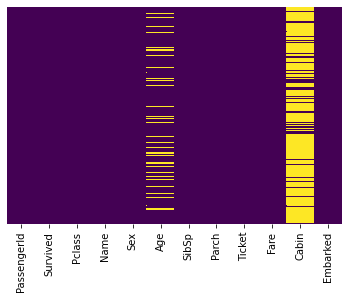

In [14]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are missing values in Age and Cabin and Embarked 

Fill missing values

In [15]:
df_train['Age'].fillna(df_train['Age'].mode()[0], inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [16]:
df_train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Number of passengers Survived and Not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

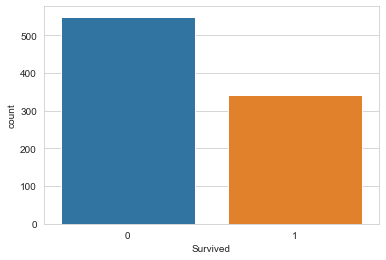

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

In [18]:
corrmat = df_train.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.05,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.36,0.08,0.02,-0.55
Age,0.04,-0.05,-0.36,1.00,-0.23,-0.16,0.11
SibSp,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.16,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.11,0.16,0.22,1.00


<AxesSubplot:>

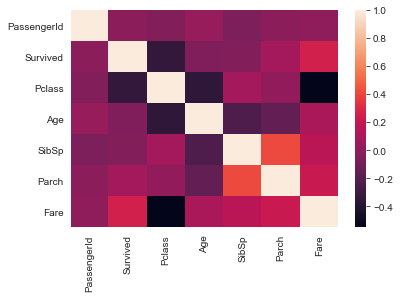

In [19]:
sns.heatmap(corrmat)

 Preprocess the data with the function « ColumnTransformer».

# DATA PRE PROCESSING AND VISUALIZATION

# PassengerID

In [20]:
df_train=df_train.drop(['PassengerId'],1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,B96 B98,S


# Pclass

In [21]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

Number of passenger per class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

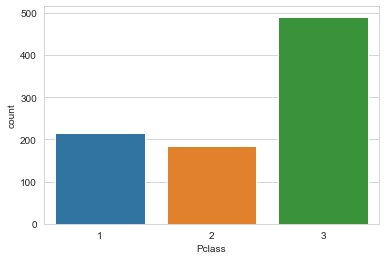

In [22]:
sns.countplot(x=df_train['Pclass'])

Number of passengers Survived based on Passenger Class

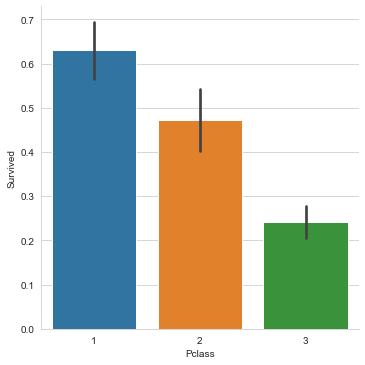

In [23]:
sns.catplot(x='Pclass',y='Survived',data=df_train,kind='bar')

# Name

In [24]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [25]:
df_train['Title']=df_train['Name'].str.extract('([A-Za-z]+)\.',)
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Title'>

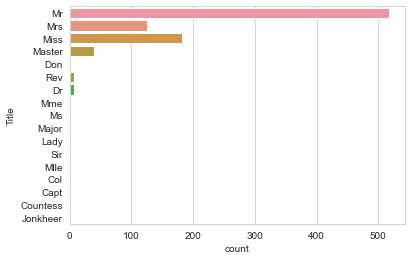

In [26]:
sns.countplot(y=df_train['Title'])

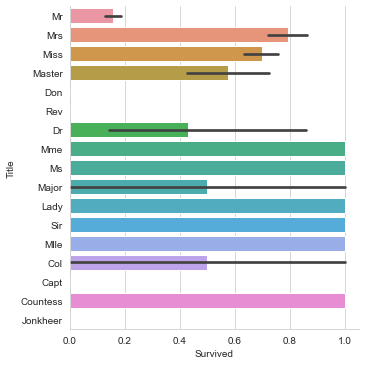

In [27]:
sns.catplot(y='Title',x='Survived',data=df_train,kind='bar')

In [28]:
df_train=df_train.drop(['Name'],1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.00,1,0,A/5 21171,7.25,B96 B98,S,Mr
1,1,1,female,38.00,1,0,PC 17599,71.28,C85,C,Mrs
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.92,B96 B98,S,Miss
3,1,1,female,35.00,1,0,113803,53.10,C123,S,Mrs
4,0,3,male,35.00,0,0,373450,8.05,B96 B98,S,Mr


# Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

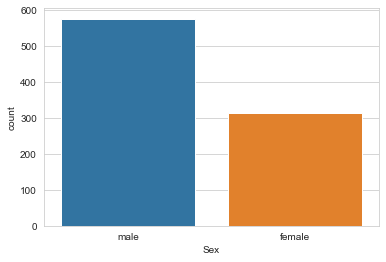

In [29]:
sns.countplot(x=df_train['Sex'])

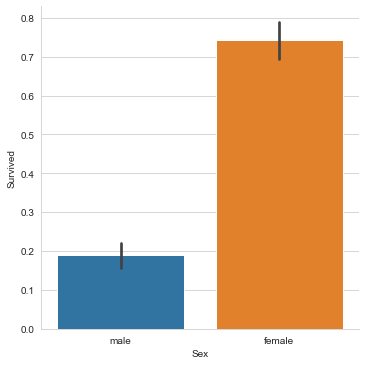

In [30]:
sns.catplot(x='Sex',y='Survived',data=df_train,kind='bar')


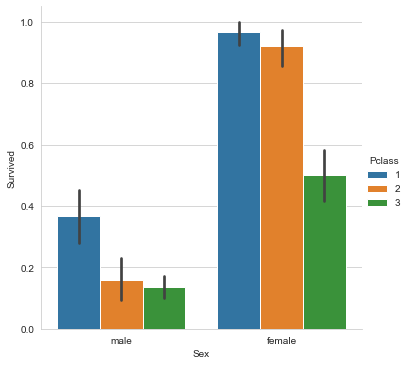

In [31]:
sns.catplot(x='Sex',y='Survived',data=df_train,kind='bar',hue='Pclass')


# Fare

Frequency of passengers group by Fare

<AxesSubplot:ylabel='Frequency'>

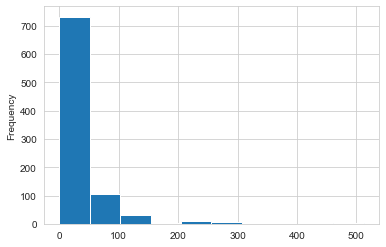

In [32]:
df_train['Fare'].plot.hist()

In [33]:
df_train['Fare_Band']=pd.cut(df_train['Fare'],3)
df_train['Fare_Band'].unique()

[(-0.512, 170.776], (170.776, 341.553], (341.553, 512.329]]
Categories (3, interval[float64]): [(-0.512, 170.776] < (170.776, 341.553] < (341.553, 512.329]]

In [34]:
#Tarif
df_train.loc[(df_train['Fare']<=170.776),'Fare']=1
df_train.loc[(df_train['Fare']>170.776) & (df_train['Fare']<=314.553),'Fare']=2
df_train.loc[(df_train['Fare']>314.553) & (df_train['Fare']<=513),'Fare']=3
df_train=df_train.drop(['Fare_Band'],1)

In [35]:
df_train['Fare'].value_counts()

1.00    871
2.00     17
3.00      3
Name: Fare, dtype: int64

# Age

Frequency of passengers group by Age

<AxesSubplot:ylabel='Frequency'>

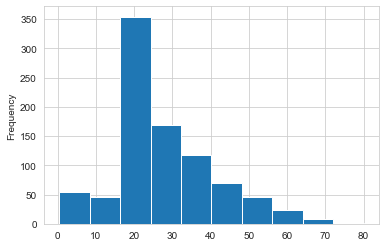

In [36]:
df_train['Age'].plot.hist()

Frequency of passengers group by Age per class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

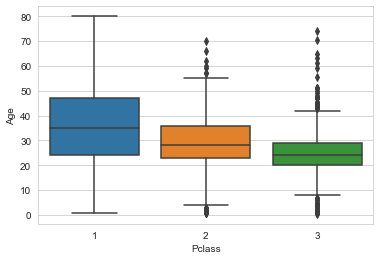

In [37]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df_train)

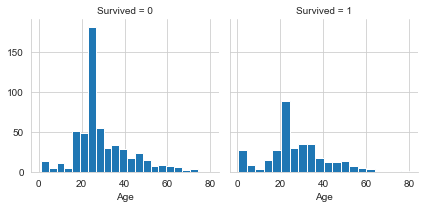

In [38]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

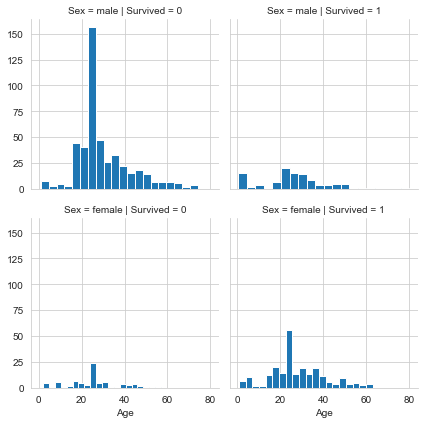

In [39]:
g = sns.FacetGrid(df_train, col='Survived',row='Sex')
g.map(plt.hist, 'Age', bins=20)

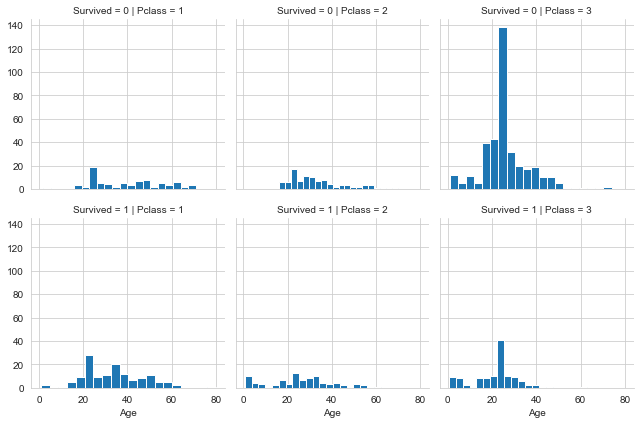

In [40]:
g = sns.FacetGrid(df_train, row='Survived',col='Pclass')
g.map(plt.hist, 'Age', bins=20)

# SibSp/Parch

In [41]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_train=df_train.drop(['SibSp','Parch'],1)

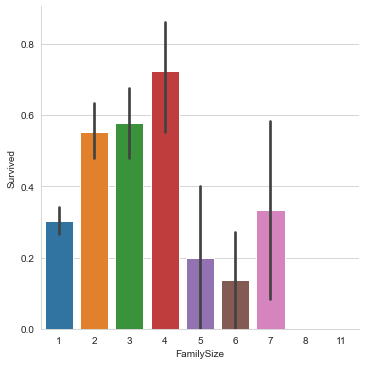

In [42]:
sns.catplot(x='FamilySize',y='Survived',data=df_train,kind='bar')


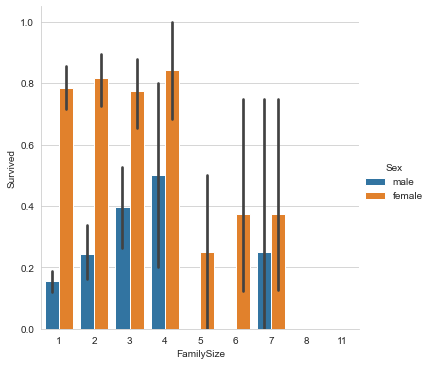

In [43]:
sns.catplot(x='FamilySize',y='Survived',data=df_train,kind='bar',hue='Sex')

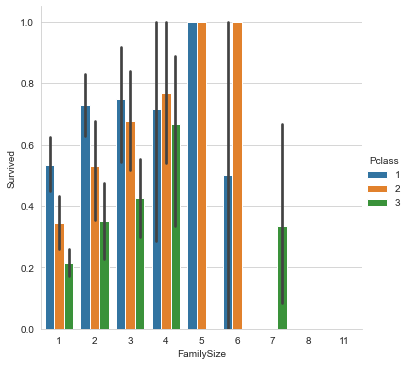

In [44]:
sns.catplot(x='FamilySize',y='Survived',data=df_train,kind='bar',hue='Pclass')

# Ticket

In [45]:
df_train=df_train.drop(['Ticket'],1)

In [46]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.00,1.00,B96 B98,S,Mr,2
1,1,1,female,38.00,1.00,C85,C,Mrs,2
2,1,3,female,26.00,1.00,B96 B98,S,Miss,1
3,1,1,female,35.00,1.00,C123,S,Mrs,2
4,0,3,male,35.00,1.00,B96 B98,S,Mr,1


# Cabin

In [47]:
df_train['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [48]:
df_train['Cabin']=df_train['Cabin'].fillna('U')
df_train['Cabin']=df_train['Cabin'].astype(str).str[0]
df_train.Cabin.unique()

array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

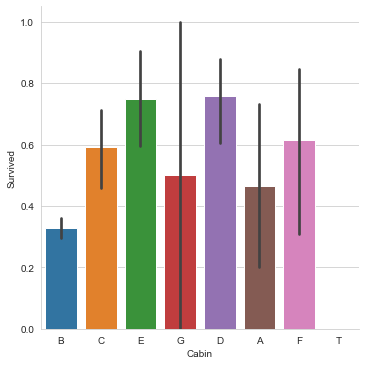

In [49]:
sns.catplot(x='Cabin',y='Survived',data=df_train,kind='bar')

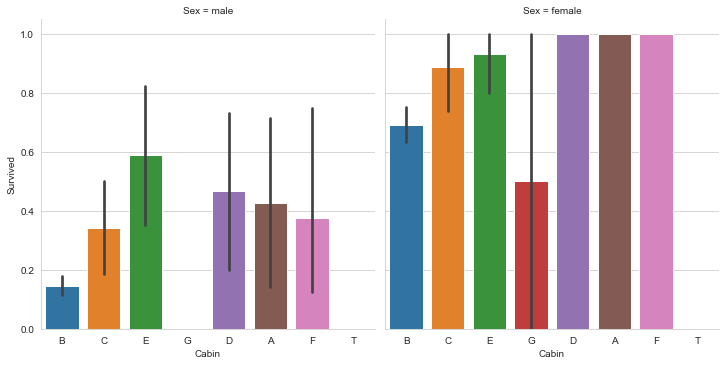

In [50]:
sns.catplot(x='Cabin',y='Survived',data=df_train,col='Sex',kind='bar')

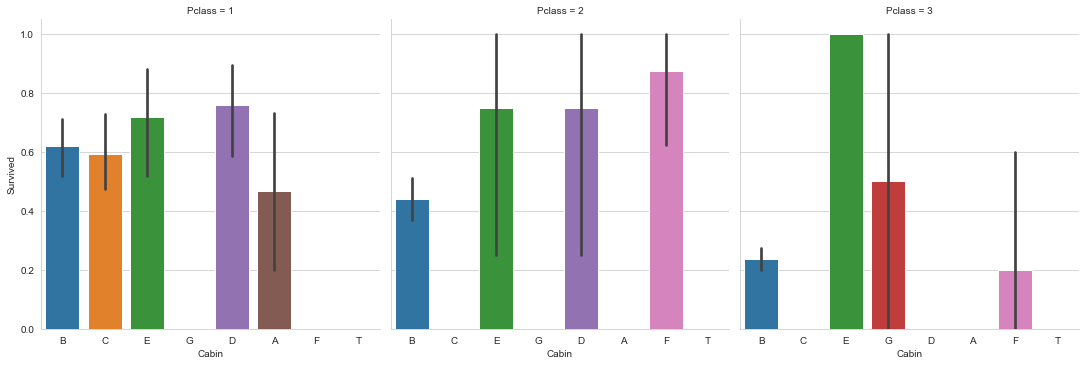

In [51]:
sns.catplot(x='Cabin',y='Survived',data=df_train,col='Pclass',kind='bar')

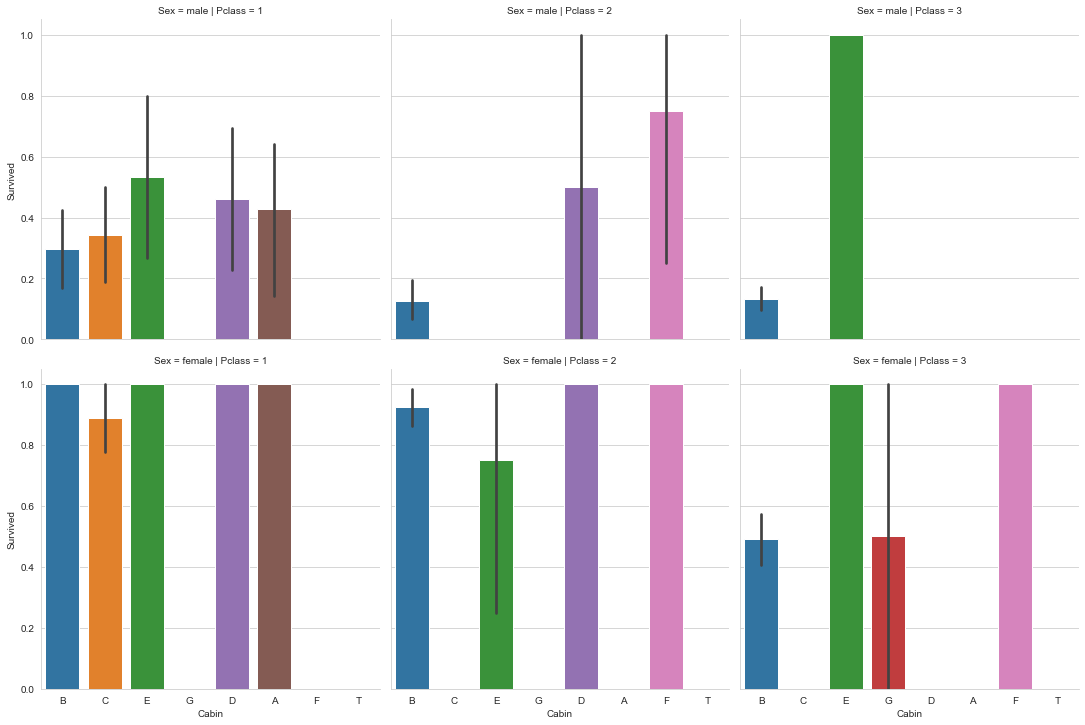

In [52]:
sns.catplot(x='Cabin',y='Survived',data=df_train,col='Pclass',row='Sex',kind='bar')

In [53]:
df_train=df_train.drop(['Cabin'],1)

In [54]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.00,1.00,S,Mr,2
1,1,1,female,38.00,1.00,C,Mrs,2
2,1,3,female,26.00,1.00,S,Miss,1
3,1,1,female,35.00,1.00,S,Mrs,2
4,0,3,male,35.00,1.00,S,Mr,1


# Embarked

In [55]:
print(df_train['Embarked'].unique())

['S' 'C' 'Q']


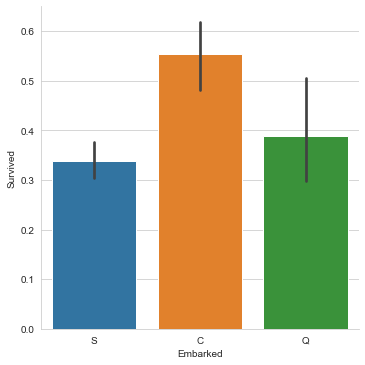

In [56]:
sns.catplot(x='Embarked',y='Survived',data=df_train,kind='bar')

In [57]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.00,1.00,S,Mr,2
1,1,1,female,38.00,1.00,C,Mrs,2
2,1,3,female,26.00,1.00,S,Miss,1
3,1,1,female,35.00,1.00,S,Mrs,2
4,0,3,male,35.00,1.00,S,Mr,1


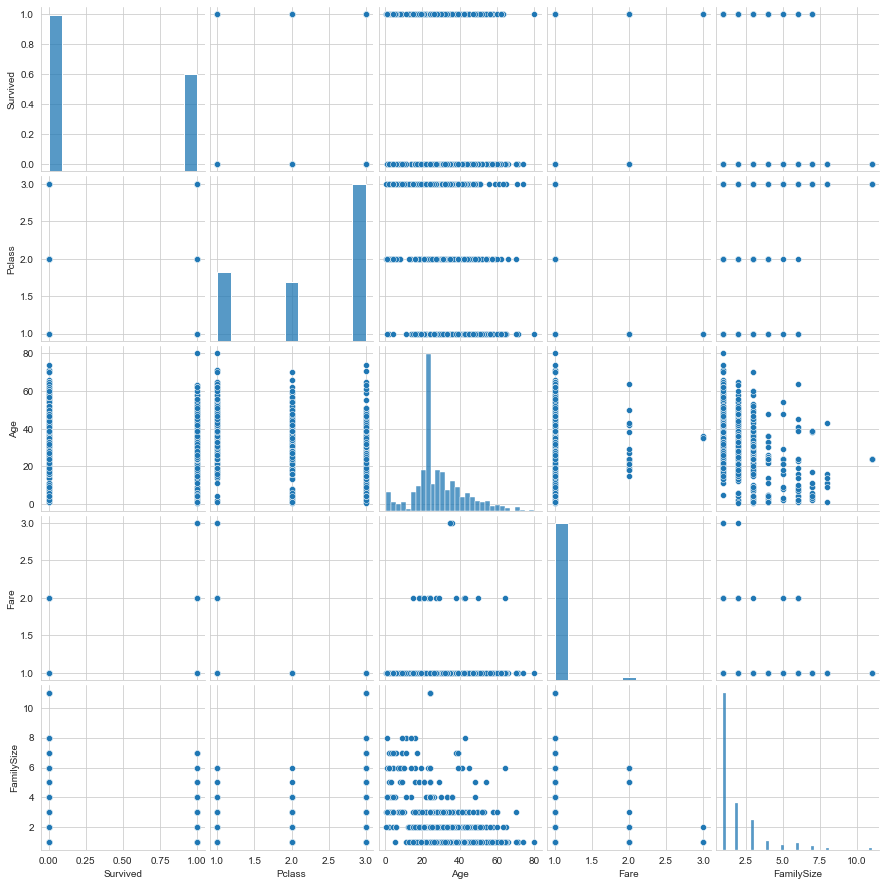

In [60]:
sns.pairplot(df_train)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.00,1.00,S,Mr,2
1,1,1,female,38.00,1.00,C,Mrs,2
2,1,3,female,26.00,1.00,S,Miss,1
3,1,1,female,35.00,1.00,S,Mrs,2
4,0,3,male,35.00,1.00,S,Mr,1


In [64]:
copy_df_train=df_train
copy_df_test=df_test
copy_df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.00,1.00,S,Mr,2
1,1,1,female,38.00,1.00,C,Mrs,2
2,1,3,female,26.00,1.00,S,Miss,1
3,1,1,female,35.00,1.00,S,Mrs,2
4,0,3,male,35.00,1.00,S,Mr,1


# Label Encoding

In [74]:
label = ['Survived']
numeric_features = ['Age', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked','Title', 'Fare']

A_train = copy_df_train[numeric_features + categorical_features]
b_train = copy_df_train[label]




col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Embarked', 'Title']),
        ('ordinal', OrdinalEncoder(), ['Sex'])
    ],
    remainder='passthrough'                                 
)
categorical_transformer = Pipeline(steps=[
    ('col', col_transformer)
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

NameError: name 'numeric_transformer' is not defined

In [ ]:
A_train.head()
b_train.head()
A_test.head()

In [75]:
df_train=pd.get_dummies(columns=['Pclass','Sex','Embarked','Title','Age','Fare'],data=df_train)
df_train.head()


,Survived,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Fare_1.0,Fare_2.0,Fare_3.0
0,0,2,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,2,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,2,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [76]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [95]:
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_train

Train set: (801, 117) (801,)
Test set: (90, 117) (90,)


array([[-0.56914756,  1.71633703, -0.49570472, ...,  0.16002561,
        -0.14725377, -0.06131393],
       [-0.56914756, -0.58263615, -0.49570472, ...,  0.16002561,
        -0.14725377, -0.06131393],
       [-0.56914756, -0.58263615,  2.01732998, ...,  0.16002561,
        -0.14725377, -0.06131393],
       ...,
       [-0.56914756, -0.58263615,  2.01732998, ...,  0.16002561,
        -0.14725377, -0.06131393],
       [-0.56914756,  1.71633703, -0.49570472, ...,  0.16002561,
        -0.14725377, -0.06131393],
       [ 0.05026439, -0.58263615,  2.01732998, ...,  0.16002561,
        -0.14725377, -0.06131393]])

In [96]:
scaler.fit(X_test)
X_test=scaler.transform(X_test)
X_test

array([[-0.48913987, -0.4108907 , -0.63737744, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48913987, -0.4108907 , -0.63737744, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48913987, -0.4108907 , -0.63737744, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.48913987, -0.4108907 ,  1.56892908, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76864837, -0.4108907 ,  1.56892908, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.39754249, -0.4108907 ,  1.56892908, ...,  0.        ,
         0.        ,  0.        ]])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01)

In [148]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2' , 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)

In [149]:
print("Best Score: %f \nBest params : %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score: 0.805243 
Best params : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [150]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.1 , penalty='l1',solver='liblinear')
LR.fit(X_train,y_train)
print('Logistic Regression Train Score :',LR.score(X_train,y_train))
print('Logistic Regression Test Score :',LR.score(X_test,y_test))

Logistic Regression Train Score : 0.8451935081148564
Logistic Regression Test Score : 0.8777777777777778


In [151]:
y_predict_LR=LR.predict(X_test)
print('Y Predict: ',y_predict_LR)

Y Predict:  [0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1]


[[57  6]
 [ 5 22]]


<AxesSubplot:>

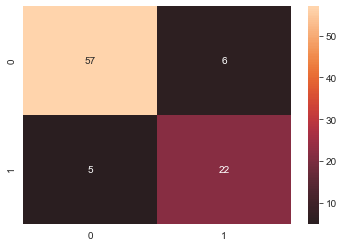

In [152]:
CM_LR=confusion_matrix(y_test,y_predict_LR)
print(CM_LR)
sns.heatmap(CM_LR,center=True,annot=True)

In [153]:
acc_LR=accuracy_score(y_test,y_predict_LR)
print(acc_LR)

0.8777777777777778


In [154]:
CR_LR=classification_report(y_test,y_predict_LR)
print(CR_LR)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.79      0.81      0.80        27

    accuracy                           0.88        90
   macro avg       0.85      0.86      0.86        90
weighted avg       0.88      0.88      0.88        90



# K-Nearest Neighbors

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [142]:
param_grid = {'n_neighbors': list(range(1,31))}
grid_search = GridSearchCV(knn, param_grid, cv=3,scoring='accuracy')
grid_result = grid_search.fit(X_train,y_train)

In [141]:
print("Best score: %f \nBest params : %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.747824 
Best params : {'n_neighbors': 1}


In [143]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print('KNN Train Score :',knn.score(X_train,y_train))
print('KNN Test Score :',knn.score(X_test,y_test))

KNN Train Score : 0.916354556803995
KNN Test Score : 0.7555555555555555


In [144]:
y_predict_knn=knn.predict(X_test)
print(y_predict_knn)

[0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


[[48 15]
 [ 7 20]]


<AxesSubplot:>

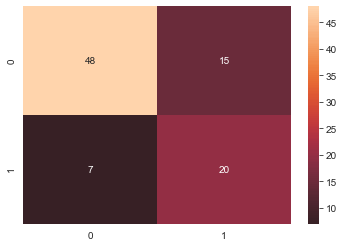

In [145]:
cm_knn=confusion_matrix(y_test,y_predict_knn)
print(cm_knn)
sns.heatmap(cm_knn,center=True,annot=True)

In [146]:
acc_knn=accuracy_score(y_test,y_predict_knn)
print(acc_knn)


0.7555555555555555


In [147]:
cr_knn=classification_report(y_test,y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        63
           1       0.57      0.74      0.65        27

    accuracy                           0.76        90
   macro avg       0.72      0.75      0.73        90
weighted avg       0.78      0.76      0.76        90



# Randome Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()

In [133]:
grid = { 
    'n_estimators': [10, 100, 1000],
    'max_depth' : [4,5,6,7,8],
}
grid_search = GridSearchCV(rf, param_grid=grid, cv=3,scoring='accuracy')
grid_result = grid_search.fit(X_train,y_train)

In [134]:
print("Best Score : %f \nBest param : %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score : 0.818976 
Best param : {'max_depth': 6, 'n_estimators': 10}


In [135]:
rf=RandomForestClassifier(max_depth=6,n_estimators=10)
rf.fit(X_train,y_train)
print('Random Force Train Score :',rf.score(X_train,y_train))
print('Random Force Test Score :',rf.score(X_test,y_test))

Random Force Train Score : 0.83270911360799
Random Force Test Score : 0.8777777777777778


In [136]:
y_pred_rf=rf.predict(X_test)
print('Y Pred',y_pred_rf)

Y Pred [0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1]


[[59  4]
 [ 7 20]]


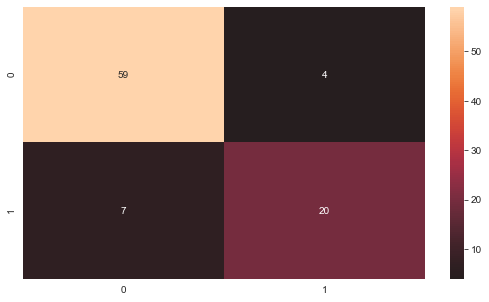

In [137]:
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [138]:
acc_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',acc_rf)

Accuracy Score 0.8777777777777778


In [139]:
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.83      0.74      0.78        27

    accuracy                           0.88        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.88      0.88      0.88        90

